In [3]:
import numpy as np
import matplotlib.pyplot as plt
#import scipy.integrate as intgrt

# first, define universal constants (in SI units)
kB = 1.3806e-23 # Boltzmann's constant
h = 6.626e-34 # Planck's constant
c = 2.998e+8 # light speed

# next, define BB (Planck) function per unit wavelength
def black_body_lambda(L,T):
    frac_term = 1.0/(np.exp((h*c/(L*kB*T))) - 1.0)
    B_L = ((2.0*h*(c**2)*frac_term)/(L**5))
    return B_L

# define BB (Planck) function per unit frequency
def black_body_freq(nu,T):
    frac_term = 1.0/(np.exp((h*nu/(kB*T))) - 1.0)
    B_nu = ((2.0*h*(nu**3)*frac_term)/(c**2))
    return B_nu

# avoid NaN occurances due to 0/0
def avoid_nan(numer,denom):
    if (numer == 0.0 and denom == 0.0):
        y = 0.0
    else:
        y = numer,denom
    return y

print 'preparation complete'

preparation complete


In [3]:
omega_init = []
theta_init = []
x = []

for i in range (0,22):
    omega_init.append(i*0.05)
omega = np.array(omega_init)
print omega

for i in range (0,19):
    theta_init.append(i*20)
theta = np.array(omega_init)

print omega
#assume sin(theta) = 1
for i in range(len(omega)):
    for j in range(len(theta)):
        xval = (3/(omega[i]*np.sin(theta[j]))*np.cos((np.pi + np.arccos(omega[i]*np.sin(theta[j])))/3))
        x.append(xval)
x_final = np.array(x)
"""
fig,rot = plt.subplots()
rot.plot(omega,x_final)
plt.show()"""

[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05]
[ 0.    0.05  0.1   0.15  0.2   0.25  0.3   0.35  0.4   0.45  0.5   0.55
  0.6   0.65  0.7   0.75  0.8   0.85  0.9   0.95  1.    1.05]


C:\Users\AlexLW\Anaconda2\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars


'\nfig,rot = plt.subplots()\nrot.plot(omega,x_final)\nplt.show()'

In [4]:
# black body filter visualisation


# wavelength array, in cm
L = []
for i in range(100,1101): # wavelength range: 100-1200 nm = (10-120) x 10^(-8) m
    L.append(i*(1.0e-9))
L = np.array(L)
print 'Number of points per blackbody curve (wavelength values): '
print L.shape
print L
# effective temperature values
Teff_vals = [3500.0, 3750.0, 4000.0, 4250.0, 4500.0, 4750.0, 5000.0, 5250.0, 5500.0, 5750.0, 6000.0, 6250.0, 6500.0, 6750.0, 7000.0, 7250.0, 7500.0, 7750.0, 8000.0, 8250.0, 8500.0, 8750.0, 9000.0, 9250.0, 9500.0, 9750.0, 10000.0, 10250.0, 10500.0, 10750.0, 11000.0, 11250.0, 11500.0, 11750.0, 12000.0, 12250.0, 12500.0, 12750.0, 13000.0, 14000.0, 15000.0, 16000.0, 17000.0, 18000.0, 19000.0, 20000.0, 21000.0, 22000.0, 23000.0, 24000.0, 25000.0, 26000.0, 27000.0, 28000.0, 29000.0, 30000.0, 31000.0, 32000.0, 33000.0, 34000.0, 35000.0, 36000.0, 37000.0, 38000.0, 39000.0, 40000.0, 41000.0, 42000.0, 43000.0, 44000.0, 45000.0, 46000.0, 47000.0, 48000.0, 49000.0, 50000.0]
Teff_vals = np.array(Teff_vals)
Teff_vals_red = [3500.0, 4000.0, 4500.0, 5000.0, 5500.0, 6000.0, 6500.0, 7000.0, 7500.0, 8000.0, 8500.0, 9000.0, 9500.0, 10000.0]
print 'Number of blackbody curves: '
print len(Teff_vals)

B_lam_arr = []
for i in range(len(Teff_vals_red)):
    row_arr = []
    Teff = Teff_vals_red[i]
    # blackbody calculation for 'Teff'
    B_lam_i = black_body_lambda(L,Teff)
    #row_arr.append(Teff)
    #row_arr.append(B_lam_i)
    #if (i == 0):
        #print 'Teff, B_lam_i = ', Teff, B_lam_i
    B_lam_arr.append(B_lam_i)
    
B_lam = np.array(B_lam_arr)
print 'Blackbody plot y-values: '
print B_lam.shape
print 'First curve: Teff = ', Teff_vals[0]
# NOTE: each ROW of B_lam contains data for 1 Teff-value!!!
# -> each COLUMN contains data for 1 wavelength!!!
print B_lam[0,:].shape
print B_lam[0,:]

# get data for curve of maxima
max_list = []
#L_Tmax_list = []

print 'row shape: ',B_lam[0,:].shape
print 'Number of rows:',B_lam[:,0].shape
row_count = 0
for i in range(len(Teff_vals_red)):
    row_count += 1
    Bmax = np.argmax(B_lam[i,:])
    temp_list = [L[Bmax],max(B_lam[i,:])]
    max_list.append(temp_list)
    print Bmax, temp_list
    #if (i == 10):
        
    #    print len(temp_list)
    #    print B_lam[:,i]
    #L_Tmax_list.append(L[Bmax])
print 'Number of iterations:', row_count
max_array = np.array(max_list)
print 'Array of curve maxima'
print max_array.shape
print max_array
#print B_lam[0,:]
#for 
#bb.plot(L[Bmax],max(B_lam[n*i]))

Number of points per blackbody curve (wavelength values): 
(1001L,)
[  1.00000000e-07   1.01000000e-07   1.02000000e-07 ...,   1.09800000e-06
   1.09900000e-06   1.10000000e-06]
Number of blackbody curves: 
76
Blackbody plot y-values: 
(14L, 1001L)
First curve: Teff =  3500.0
(1001L,)
[  1.66767764e+01   2.38383315e+01   3.38209961e+01 ...,   1.80841731e+12
   1.80649749e+12   1.80457625e+12]
row shape:  (1001L,)
Number of rows: (14L,)
728 [8.2800000000000006e-07, 2150672195113.9199]
624 [7.2400000000000008e-07, 4193083367184.5347]
544 [6.44e-07, 7556080350406.499]
480 [5.8000000000000006e-07, 12796272511776.076]
427 [5.2699999999999999e-07, 20608548495798.07]
383 [4.8300000000000008e-07, 31841260406651.25]
346 [4.4600000000000005e-07, 47511707263746.234]
314 [4.1400000000000003e-07, 68821510243645.437]
286 [3.8600000000000004e-07, 97171577513616.219]
262 [3.6200000000000004e-07, 134178667749905.11]
241 [3.41e-07, 181688979525730.0]
222 [3.22e-07, 241794571213007.97]
205 [3.05000000000

C:\Users\AlexLW\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  import sys
C:\Users\AlexLW\Anaconda2\lib\site-packages\ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


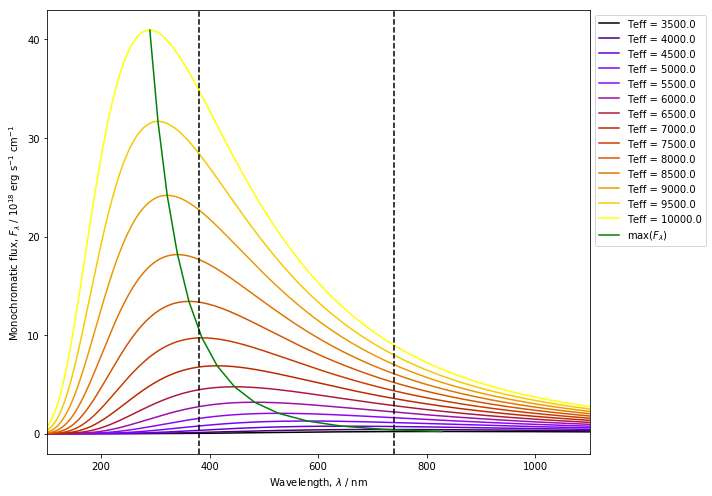

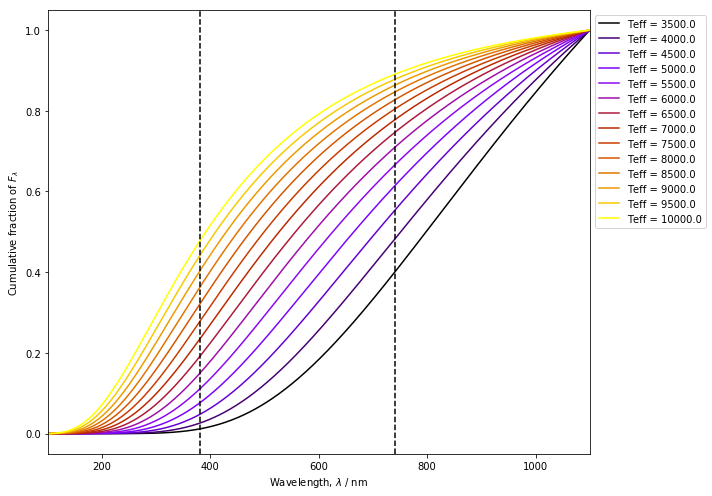

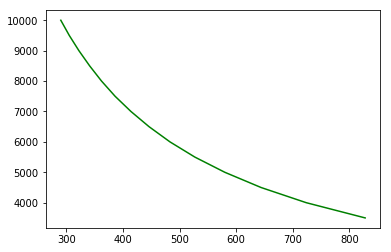

0.002895 0.0029


In [10]:
# plots
n = 1
col_map = plt.cm.gnuplot
wl_nano = L*1.0e+9

fig,bb = plt.subplots(figsize=(10,7))
plt.gca().set_color_cycle([col_map(i) for i in np.linspace(0, n, len(Teff_vals_red))])
for i in range(len(Teff_vals_red)/n):
    bb.plot(wl_nano,B_lam[n*i,:]*1.0e-13,label = ('Teff = ' + str(Teff_vals_red[n*i])))
    
wl_max_nano = max_array[:,0]*1.0e+9
bb.plot(wl_max_nano,max_array[:,1]*1.0e-13,'g', label=r'max($F_{\lambda}$)')
bb.axvline(x=380,color='k',linestyle='--')
bb.axvline(x=740,color='k',linestyle='--')
#bb.set_ylim(0,2e+16)
bb.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
bb.set_xlabel(r'Wavelength, $\lambda$ / nm')
bb.set_ylabel(r'Monochromatic flux, $F_{\lambda}$ / $10^{18}$ erg s$^{-1}$ cm$^{-1}$')
bb.set_xlim(min(wl_nano),max(wl_nano))
fig.tight_layout()
fig.savefig('mphil_stuff/blackbody_teff_illustration.pdf')

figc,bbc = plt.subplots(figsize=(10,7))
plt.gca().set_color_cycle([col_map(i) for i in np.linspace(0, n, len(Teff_vals_red))])
for i in range(len(Teff_vals_red)/n):
    cumul_B_lam = np.cumsum(B_lam[n*i,:]*1.0e-13)
    bbc.plot(wl_nano,cumul_B_lam/max(cumul_B_lam),label = ('Teff = ' + str(Teff_vals_red[n*i])))

bbc.axvline(x=380,color='k',linestyle='--')
bbc.axvline(x=740,color='k',linestyle='--')
#bb.set_ylim(0,2e+16)
bbc.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))
bbc.set_xlabel(r'Wavelength, $\lambda$ / nm')
bbc.set_ylabel(r'Cumulative fraction of $F_{\lambda}$')
bbc.set_xlim(min(wl_nano),max(wl_nano))
figc.tight_layout()
figc.savefig('mphil_stuff/cumulative_blackbody_teff_illustration.pdf')

figw,axw = plt.subplots()


axw.plot(wl_max_nano,Teff_vals_red,'g')

plt.show()

wien_test = max_array[:,0]*Teff_vals_red
print min(wien_test),max(wien_test)